In [2]:
import pandas as pd

In [3]:
#This is the Richmond USGS Data gage
river_richmnd = pd.read_csv('JR_Richmond02037500.csv')

/Users/williampc/opt/anaconda3/envs/geop/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
river_richmnd.dropna();

In [5]:
#Hurricane data for the basin - Names of Relevant Storms - This will be used for getting the storms from the larger set
JR_stormnames = pd.read_csv('gis_match.csv')


In [7]:
# Bring in the Big HURDAT data, from 1950 forward (satellites and data quality, etc.)
HURDAT = pd.read_csv('hurdatcleanva_1950_present.csv')
HURDAT


,Storm Number,Storm Name,Storm Status,Lat,Lon,Time,Maxspeed
0,AL021952,ABLE,TS,36.6,-79.9,9/1/52 0:00,40
1,AL021952,ABLE,TS,38.1,-78.6,9/1/52 6:00,45
2,AL021952,ABLE,TS,39.5,-77.1,9/1/52 12:00,50
3,AL031952,UNNAMED,TD,37.5,-82.3,8/28/52 18:00,20
4,AL031953,BARBARA,HU,36.1,-75.9,8/14/53 9:00,70
...,...,...,...,...,...,...,...
163,AL021972,AGNES,TD,34.4,-79.0,6/21/72 12:00,30
164,AL021972,AGNES,TS,35.2,-77.6,6/21/72 18:00,40
165,AL021972,AGNES,TS,35.8,-75.7,6/22/72 0:00,45
166,AL021972,AGNES,TS,36.9,-74.3,6/22/72 6:00,50


In [9]:
VA_JR_stormmatch = JR_stormnames.merge(HURDAT)


In [10]:
# Now the common storms for the James Basin have been created. We now have time and storms together for the basin
#checking some things about the data

In [11]:
# How many unique storms within the basin since 1950? 62 here and 53 in the Data on the Coast.NOAA.gov's website. 
#I think we are close enough here, digging may show some other storms, but I think we have at least captured the ones 
#from NOAA
len(VA_JR_stormmatch['Storm Number'].unique());

In [12]:
#double ck the lat and long parameters
print(VA_JR_stormmatch['Lat'].min(),
VA_JR_stormmatch['Lon'].min(),
VA_JR_stormmatch['Lat'].max(),
VA_JR_stormmatch['Lon'].max())

32.2 -83.8 39.9 -73.1


In [13]:
#Make a csv of this data
VA_JR_stormmatch.to_csv('storms_in_basin.csv', sep=',',encoding = 'utf-8')

In [14]:
#names of storms 
len(VA_JR_stormmatch['Storm Number'].unique())
VA_JR_stormmatch['Storm Number'].unique()
numbers = VA_JR_stormmatch['Storm Number']

In [15]:
#grab a storm from this list and lok at the times
#Bill = pd.DataFrame(VA_JR_stormmatch['Storm Number'=='AL032003'])

storm = VA_JR_stormmatch[(VA_JR_stormmatch["Storm Number"] == 'AL021972')]
storm
#so this is the data for a storm named Bill that had a pth through the basin * BILL WAS A BACKDOOR Storm



,Storm Name,Storm Number,Storm Status,Lat,Lon,Time,Maxspeed
254,AGNES,AL021972,TD,32.2,-83.8,6/20/72 12:00,30
255,AGNES,AL021972,TD,32.9,-82.8,6/20/72 18:00,30
256,AGNES,AL021972,TD,33.5,-81.7,6/21/72 0:00,30
257,AGNES,AL021972,TD,33.8,-80.2,6/21/72 6:00,30
258,AGNES,AL021972,TD,34.4,-79.0,6/21/72 12:00,30
259,AGNES,AL021972,TS,35.2,-77.6,6/21/72 18:00,40
260,AGNES,AL021972,TS,35.8,-75.7,6/22/72 0:00,45
261,AGNES,AL021972,TS,36.9,-74.3,6/22/72 6:00,50
262,AGNES,AL021972,TS,38.2,-73.1,6/22/72 12:00,60


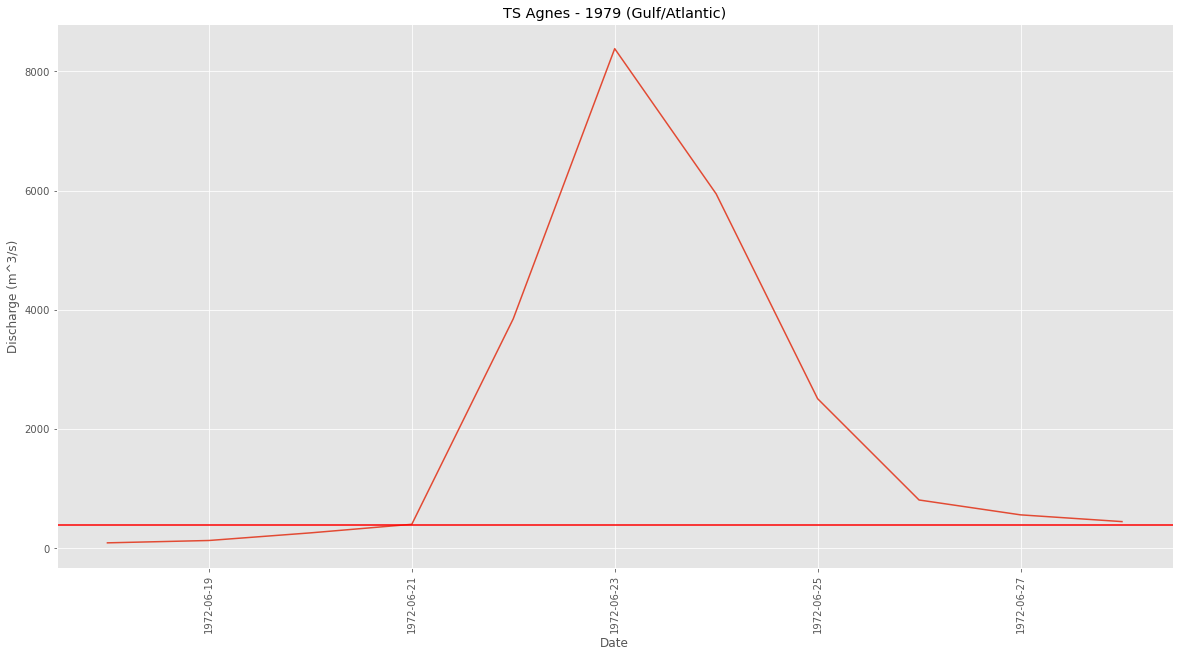

In [18]:
# plotting for the USGS river Gage data 
import matplotlib
import matplotlib.pyplot as plt
from climata.usgs import DailyValueIO
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
import numpy as np

register_matplotlib_converters()
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20.0, 10.0)
# set parameters
nyears = 1
ndays = 365 * nyears
station_id = "02037500"
param_id = "00060"

datelist = pd.date_range(end=datetime.today(), periods=ndays).tolist()
#take an annual average for the river
annual_data = DailyValueIO(
    start_date="1972-01-01",
    end_date="1973-01-01",
    station=station_id,
    parameter=param_id,)
for series in annual_data:
    flow = [r[1] for r in series.data]
    si_flow_annual = np.asarray(flow) * 0.0283168
    flow_mean = np.mean(si_flow_annual)

#now for the storm     
dischg = DailyValueIO(
    start_date="1972-06-18",
    end_date="1972-06-28",
    station=station_id,
    parameter=param_id,)
#create lists of date-flow values
for series in dischg:
    flow = [r[1] for r in series.data]
    si_flow = np.asarray(flow) * 0.0283168
    dates = [r[0] for r in series.data]
plt.plot(dates, si_flow)
plt.axhline(y=flow_mean, color='r', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Discharge (m^3/s)')
plt.title("TS Agnes - 1979 (Gulf/Atlantic)")
plt.xticks(rotation='vertical')
plt.show()

In [20]:
max(si_flow)

8381.7728

In [21]:
percent_incr= (abs(max(si_flow)-flow_mean)/abs(flow_mean))*100
percent_incr

2015.8382074819401

In [22]:
#take an annual average for the river
annual_data = DailyValueIO(
    start_date="1989-03-01",
    end_date="1989-10-01",
    station=station_id,
    parameter=param_id,)
for series in annual_data:
    flow = [r[1] for r in series.data]
    si_flow_annual = np.asarray(flow) * 0.0283168
    flow_mean_season = np.mean(si_flow_annual)
print(abs(flow_mean-flow_mean_season))

96.75539956230904


In [23]:
print(flow_mean)
print(flow_mean_season)

396.1443162506812
299.38891668837215
